# Python for Neuroscientists Week 7: Data Visualization


# Loading and preparing our *neural data!!*
We'll begin today by loading in some (real!) data. Before we do that, let's import some packages:

In [1]:
#remember that when we use 'as', we are simply telling Python what term we want to refer to our imported packages by
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#this does some important stuff behind the scenes for plotting specifically for jupyter notebooks (same in vscode), ask us if you want to learn more
%matplotlib inline 

Now, let's load and examine our data!

In [2]:
data = pd.read_csv('SST_data.csv')
data

,dF/F,time_from_stim,cell_id,exposure,trial_id,omitted,pupil_area,mean_response
0,0.213396,-1.228129,1086500633,familiar,24,False,5636.081391,0.055830
1,-0.096333,-1.195810,1086500633,familiar,24,False,5636.081391,0.055830
2,-0.117812,-1.163491,1086500633,familiar,24,False,5636.081391,0.055830
3,0.096526,-1.131172,1086500633,familiar,24,False,5636.081391,0.055830
4,-0.000783,-1.098852,1086500633,familiar,24,False,5636.081391,0.055830
...,...,...,...,...,...,...,...,...
689770,-0.116568,1.357393,1086500770,novel,4802,False,7985.740772,-0.040271
689771,-0.011238,1.389711,1086500770,novel,4802,False,7985.740772,-0.040271
689772,0.057402,1.422030,1086500770,novel,4802,False,7985.740772,-0.040271
689773,0.114362,1.454349,1086500770,novel,4802,False,7985.740772,-0.040271


This dataset is borrowed from [Neuromatch Academy](https://compneuro.neuromatch.io/projects/neurons/README.html), but this is very much real data, generated by the Allen Institute! Briefly, what you see here are two-photon calcium imaging signals from a single mouse performing a visual change detection task. I've curated this dataset just a little bit, so we're only looking at SST-expressing interneurons. To better understand what's going on here, let's traverse this dataframe a little bit.

P.S. If you want to learn more about the dataset, check out the youtube video in the NMA link!

In [3]:
#You can index dataframes using .COLUMN_NAME - Pandas is very flexible!
data.cell_id.unique()

array([1086500633, 1086500392, 1086500770, 1086500872, 1086499783,
       1086499911, 1086500092, 1086500297, 1086501106, 1086501010,
       1086499499, 1086500194, 1086499628], dtype=int64)

In [4]:
singlecell_trial_data = data[(data.trial_id == 24) & (data.cell_id == 1086500633)]
# index, only look at data from a single trial by selecting the specific trial and cell_id
singlecell_trial_data

,dF/F,time_from_stim,cell_id,exposure,trial_id,omitted,pupil_area,mean_response
0,0.213396,-1.228129,1086500633,familiar,24,False,5636.081391,0.05583
1,-0.096333,-1.195810,1086500633,familiar,24,False,5636.081391,0.05583
2,-0.117812,-1.163491,1086500633,familiar,24,False,5636.081391,0.05583
3,0.096526,-1.131172,1086500633,familiar,24,False,5636.081391,0.05583
4,-0.000783,-1.098852,1086500633,familiar,24,False,5636.081391,0.05583
...,...,...,...,...,...,...,...,...
80,-0.076015,1.357406,1086500633,familiar,24,False,5636.081391,0.05583
81,0.017808,1.389725,1086500633,familiar,24,False,5636.081391,0.05583
82,-0.085116,1.422044,1086500633,familiar,24,False,5636.081391,0.05583
83,-0.176912,1.454364,1086500633,familiar,24,False,5636.081391,0.05583


Ok, now that we've examined the dataset a little bit, let me provide some documentation:

`dF/F` is the instantaneous calcium imaging signal <br>
`time_from_stim` is the timepoint of each row of data, aligned to an image presentation <br>
`cell_id` self explanatory I hope <br>
`exposure` whether the image for a a trial was familiar or novel  <br>
`trial_id` each image presentation is a separate trial <br>
`omitted` whether a trial had an omitted image <br>
`pupil_area` measured 500ms after stimulus presntation <br>
`mean_response` average dF/F over the 500ms following image presentation <br>

## Problem 1
Can you determine how many trials are in this dataset?
<details>
<summary>Click here for hint</summary>
Take a look at what we did above for cell_id - how would you do the same for trial_id, and how do you count the number of values in an array?
</details>

In [8]:
len(data.trial_id.unique())

739

# Plotting Simple Data with Matplotlib
Let's say we just want to plot the trace of a single cell, on a single trial. The package **Matplotlib** (which we imported as `plt`) is perfect for this type of plotting. Let's pull out some data.

In [11]:
single_trial_data = data[(data.trial_id == 605) & (data.cell_id == 1086500092)]
single_trial_trace = np.array(single_trial_data['dF/F'])
# dont use '.' indexing method if the name isn't a string. Use ['string']

In [12]:
single_trial_trace

array([ 0.        , -0.00496857,  0.00674423, -0.01763263, -0.04761156,
        0.08080438, -0.07205429, -0.00055223,  0.06000325, -0.1114908 ,
        0.05540281, -0.02635718,  0.0029113 ,  0.04146674, -0.00243199,
        0.01709818, -0.13901514, -0.12144603, -0.06014833, -0.04648617,
        0.06432796, -0.05723911, -0.01201382,  0.1456255 ,  0.08782762,
        0.20943731,  0.06826705, -0.05812632, -0.04514774, -0.01683397,
        0.1182166 ,  0.1507158 ,  0.03490584, -0.13279231, -0.06884541,
       -0.09240516, -0.08629911, -0.04207015, -0.03112201, -0.09212433,
        0.        ,  0.03379494, -0.04013482,  0.00201452, -0.13413554,
       -0.015636  , -0.01559674,  0.04832751, -0.03531285,  0.11599413,
       -0.00475846, -0.00955742, -0.03567727,  0.03658258,  0.05781025,
        0.0681921 , -0.13838767,  0.00517592, -0.13026594, -0.11078066,
       -0.07357377, -0.09089381, -0.11607467, -0.04319401, -0.09791592,
        0.01013106, -0.06501874, -0.04850751,  0.11253423, -0.04

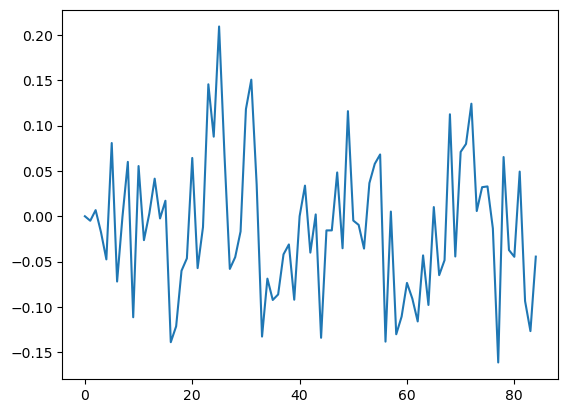

In [13]:
plt.plot(single_trial_trace)

Pretty simple right! We can even include the timepoints on the x-axis if we want:

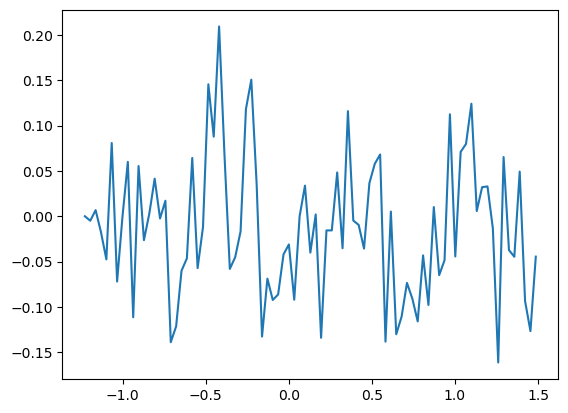

In [15]:
single_trial_timepoints = np.array(single_trial_data['time_from_stim'])
# using single_trial_data, + add on 'time_from_stim'
plt.plot(single_trial_timepoints, single_trial_trace)
# to stack plots, use plt.plot again

#### Labels
I mean, this noisy data is great and all, but what are we even looking at on our x and y axes? Let's add some labels and a title!

Text(0.5, 1.0, 'Is this a publishable graph?')

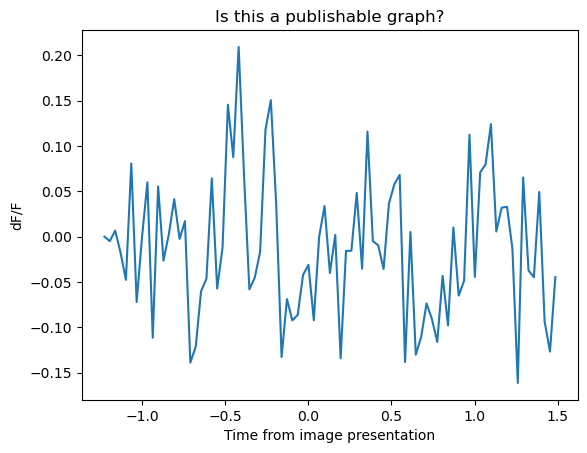

In [16]:
plt.plot(single_trial_timepoints, single_trial_trace)
plt.xlabel('Time from image presentation')
plt.ylabel('dF/F')
plt.title('Is this a publishable graph?')

#### Resizing figures
We can also resize our plot if we'd like, by calling the function `plt.figure`. If you're interested in what's going on here, talk to us after class.

Text(0.5, 1.0, 'This is a publishable graph')

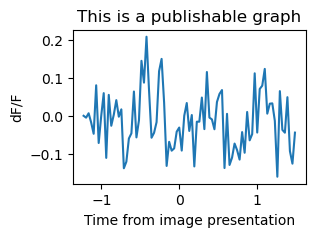

In [17]:
plt.figure(figsize = (3, 2))
plt.plot(single_trial_timepoints, single_trial_trace)
plt.xlabel('Time from image presentation')
plt.ylabel('dF/F')
plt.title('This is a publishable graph')

Ok, this data is a little underwhelming at a single-cell level, ngl. What if we want to plot a bunch of data together?

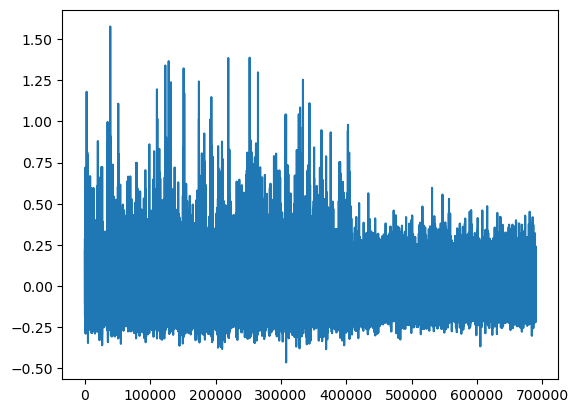

In [18]:
plt.plot(data['dF/F'])

Um that doesn't work. We could spend a lot of time parsing through our dataframe to organize the data correctly, but there are easier ways to plot datasets with many variables:


# Plotting data with Seaborn

One thing that's important to note about our dataset is that it's long-form, not wide (e.g. column labels don't correspond to time, but rather, each row represents a separate single observation). While this may seem confusing at first, it makes things intensely convenient when we use **Seaborn**, a plotting package that's built on top of matplotlib.

Seaborn is super simple: all you need to provide is your data, and then specify what columns you want on the x and y axis. For example:

<AxesSubplot:xlabel='time_from_stim', ylabel='dF/F'>

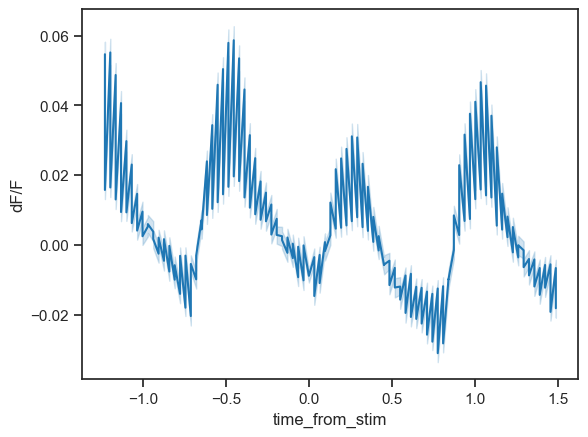

In [20]:
#ignore this for now, it just makes things look good
sns.set_style("ticks")
sns.set_context("notebook")

sns.lineplot(data = data, x = 'time_from_stim', y = 'dF/F')
# makes a lineplot w/ specified x and y axis

What if we want our x-axis to be categorical instead? Let's google a solution!

<AxesSubplot:xlabel='exposure', ylabel='mean_response'>

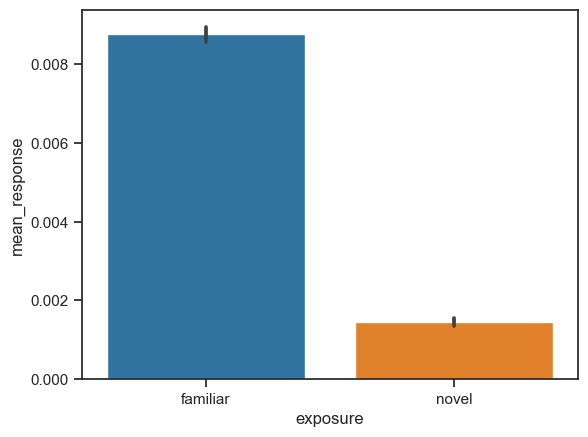

In [27]:
sns.barplot(data=data, x="exposure", y="mean_response")

## Problem 2
Make a barplot, but instead of using mean response data, plot pupil size instead.

<AxesSubplot:xlabel='exposure', ylabel='pupil_area'>

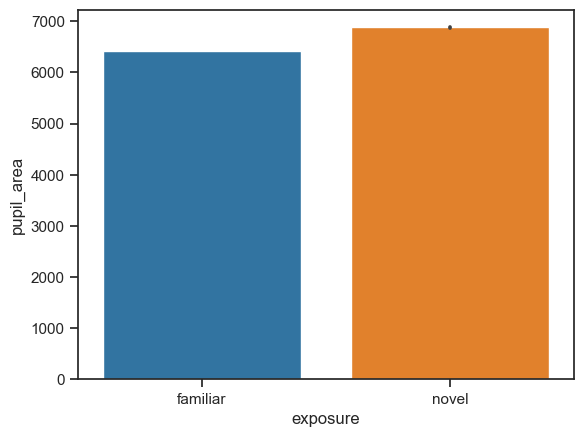

In [28]:
sns.barplot(data=data, x="exposure", y="pupil_area")

## Splitting up data in Seaborn
What if we want to split up our lineplot by familiar and novel trials? Seaborn makes this super easy by allowing you to pass a label to `hue`.

<AxesSubplot:xlabel='time_from_stim', ylabel='dF/F'>

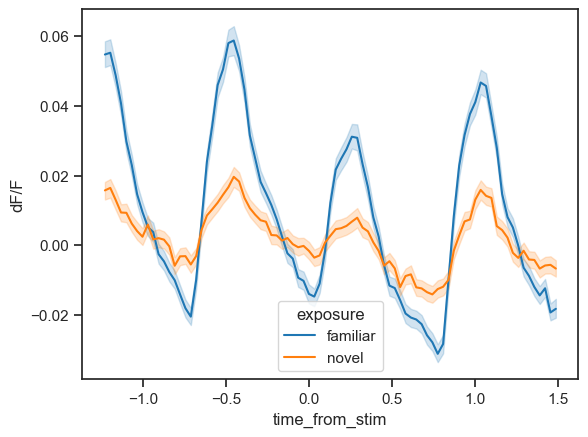

In [29]:
sns.lineplot(data = data, x = 'time_from_stim', y = 'dF/F', hue = 'exposure')
# use hue to split up variablest that you're interested in

Notice how seaborn always includes error intervals? We can turn these off if we'd like, but let's leave them be for now. Let's now check the documentation to find other ways to split up data.

<AxesSubplot:xlabel='time_from_stim', ylabel='dF/F'>

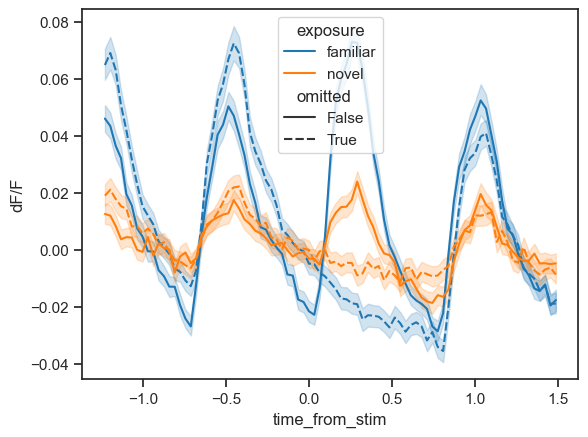

In [30]:
sns.lineplot(data = data, x = 'time_from_stim', y = 'dF/F', hue = 'exposure', style = 'omitted')

## Problem 3
1) Can you figure out how to make a histogram of pupil area in Seaborn? Here's some edited data for you to use. <br>
2) Once you do this, can you figure out how to split the histogram by `exposure`? <br>
3) CHALLENGE: If you have more time, play around with your plot! Be creative and see what else you can add to your histogram, using the documentation as a guide.

In [32]:
data_sample = data.sample(1000)
data_sample

,dF/F,time_from_stim,cell_id,exposure,trial_id,omitted,pupil_area,mean_response
199111,0.066742,0.096958,1086500770,familiar,2149,False,5021.194520,-0.006985
360721,-0.020418,0.904937,1086500297,familiar,4163,True,7844.965960,0.022174
631565,-0.030083,-0.743334,1086500770,novel,3918,False,7561.757708,-0.031871
121890,0.161783,-1.228129,1086500092,familiar,1403,True,5483.340236,-0.088659
543349,-0.081923,-0.290870,1086499783,novel,2565,False,6997.091400,-0.003285
...,...,...,...,...,...,...,...,...
171893,0.010228,-0.484788,1086500092,familiar,1851,False,5845.205911,0.000489
69600,-0.041647,1.034214,1086500770,familiar,813,False,5646.036668,-0.020912
311279,0.068360,-0.937257,1086500770,familiar,3557,True,6825.474464,-0.057118
324262,0.069054,1.098852,1086499499,familiar,3702,True,7407.187145,-0.017095


<AxesSubplot:xlabel='pupil_area', ylabel='Count'>

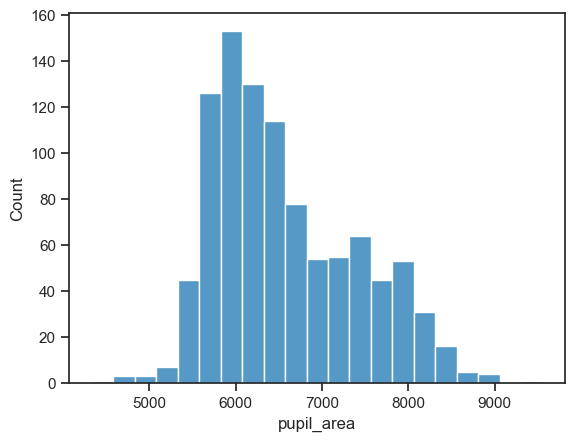

In [33]:
sns.histplot(data=data_sample, x="pupil_area")

<AxesSubplot:xlabel='pupil_area', ylabel='Count'>

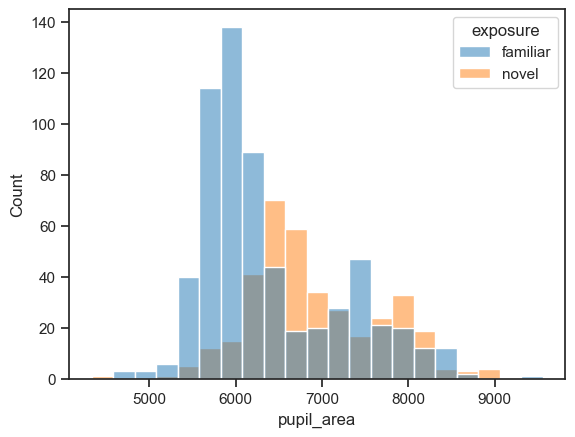

In [34]:
sns.histplot(data=data_sample, x="pupil_area", hue = 'exposure')

<AxesSubplot:xlabel='pupil_area', ylabel='Count'>

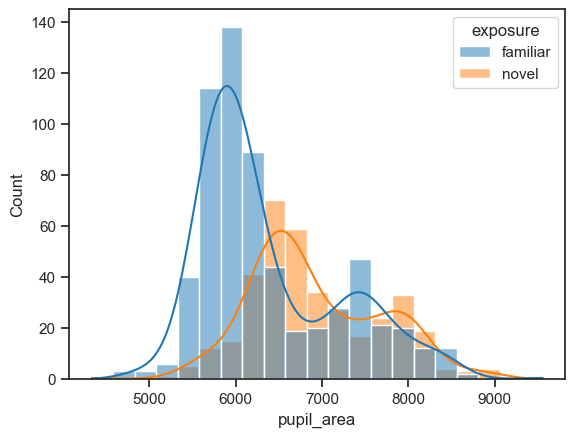

In [35]:
sns.histplot(data=data_sample, x="pupil_area", hue = 'exposure',kde=True)

## Figure aesthetics
Raw seaborn plots look ... not bad. It is nice to have more control, though. Let's start with setting styles and contexts. I'm gonna use another plot type - this one shows individual datapoints.

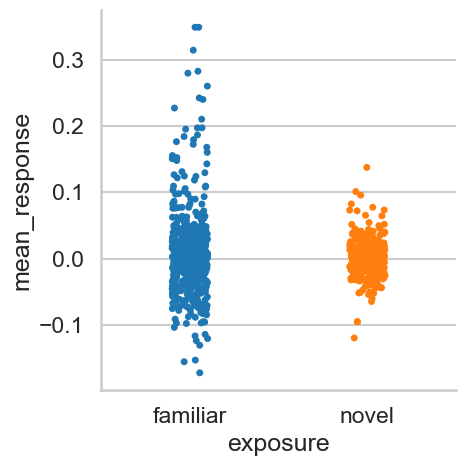

In [40]:
sns.set_style("whitegrid") # used to set up white grid
sns.set_context('talk') # how big the figure is. 'talk' makes the text bigger. could also use 'poster' etc
sns.catplot(data = data_sample, x = 'exposure', y = 'mean_response')

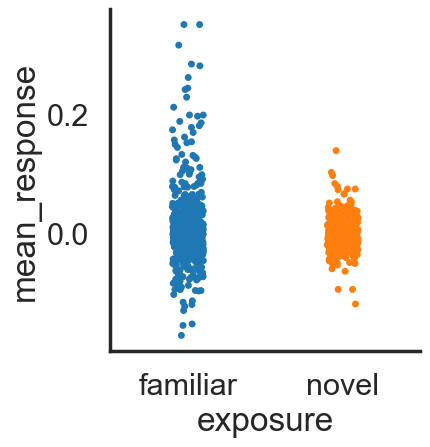

In [41]:
sns.set_style("white")
sns.set_context('poster')
sns.catplot(data = data_sample, x = 'exposure', y = 'mean_response')

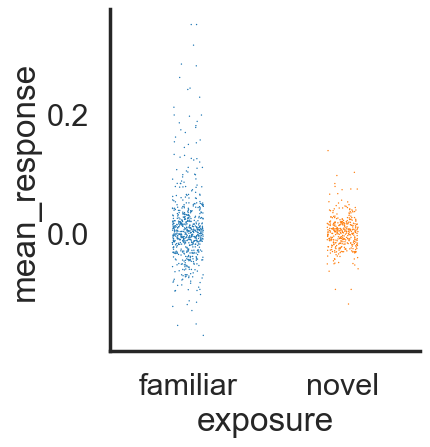

In [42]:
sns.set_style("white")
sns.set_context('poster')
sns.catplot(data = data_sample, x = 'exposure', y = 'mean_response', s = 1)

#### Colors!
Seaborn has many options to set colors for plots. Usually, the best strategy is to use a build in palette, but you can override this if you'd like as well.

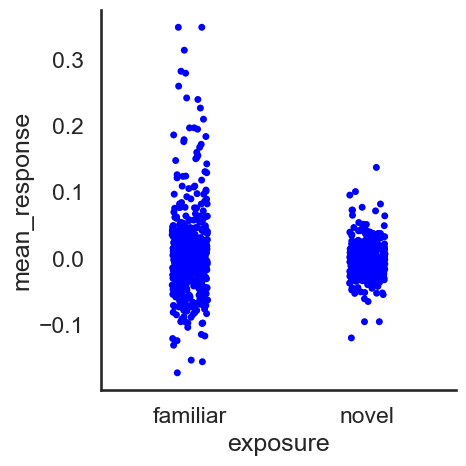

In [43]:
sns.set_context('talk')
sns.catplot(data = data_sample, x = 'exposure', y = 'mean_response', color = 'blue')

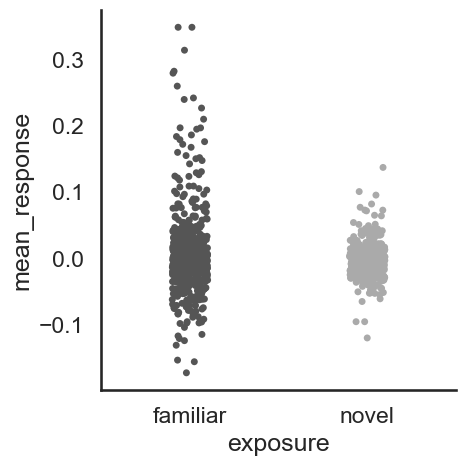

In [44]:
sns.set_context('talk')
sns.catplot(data = data_sample, x = 'exposure', y = 'mean_response', palette = 'gray')

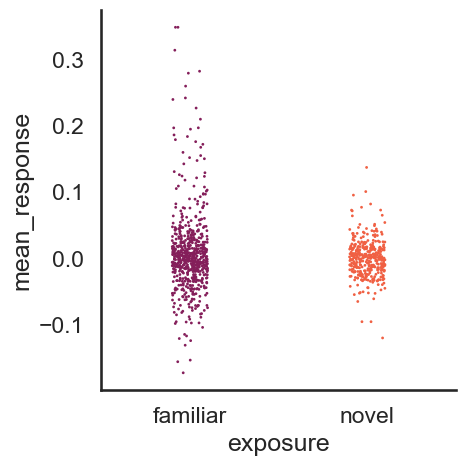

In [48]:
sns.set_context('talk')
sns.catplot(data = data_sample, x = 'exposure', y = 'mean_response', palette = 'rocket', s = 2)

#### Labels
Say we want to change the names of some of our labels. There are a few ways to do this, but the easiest is to interface with **matplotlib**


Text(0.5, 1.0, 'My first seaborn plot title!')

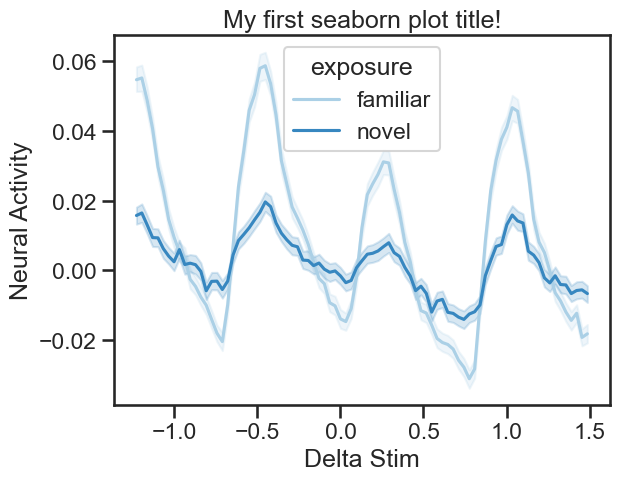

In [49]:
sns.set_style('ticks')

sns.lineplot(data = data, x = 'time_from_stim', y = 'dF/F', hue = 'exposure', palette = 'Blues')
plt.xlabel('Delta Stim')
plt.ylabel('Neural Activity')
plt.title('My first seaborn plot title!')

#### Figure size

Text(0.5, 1.0, 'My first seaborn plot title!')

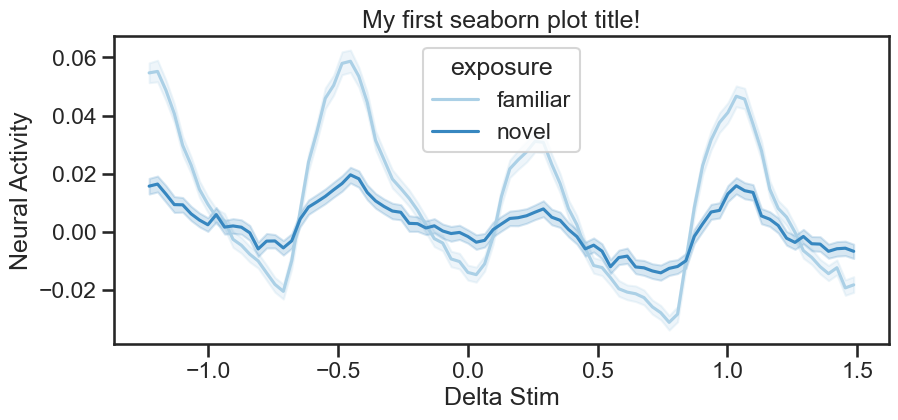

In [50]:
plt.figure(figsize=(10,4))
sns.lineplot(data = data, x = 'time_from_stim', y = 'dF/F', hue = 'exposure', palette = 'Blues')
plt.xlabel('Delta Stim')
plt.ylabel('Neural Activity')
plt.title('My first seaborn plot title!')

#### Multiple plots in one figure
Seaborn has a really nice function called `relplot` which makes it very easy to split data based on various features into grids of graphs. This is super useful when you have tons of categorical multivariate data to parse through.

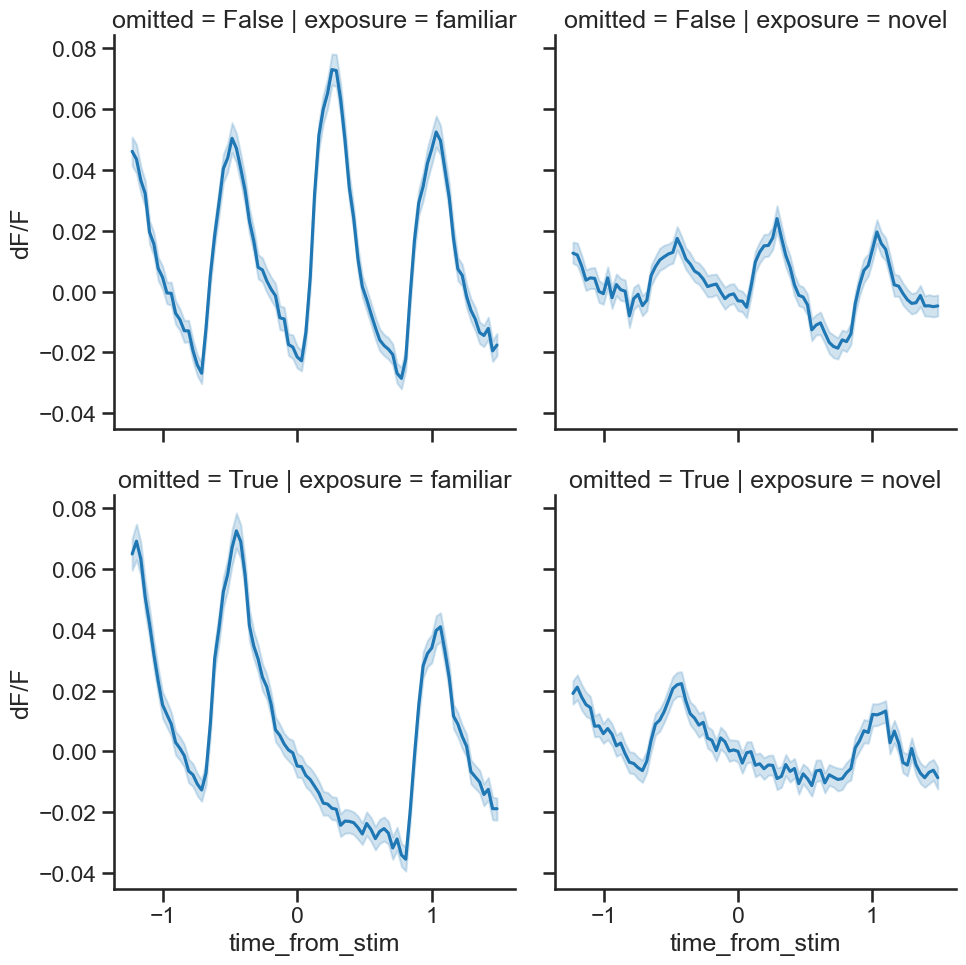

In [51]:
sns.relplot(data = data, kind = 'line', x = 'time_from_stim', y = 'dF/F', col = 'exposure', row = 'omitted')

# use col and row to set up grids of plots

## Problem 4
1) Take one of the graphs we've created in class and change: <br>
    a) colors - find a colorblind friendly palette for me ;) <br>
    b) labels - what would you want the x and y axes to say? <br>
    c) title - up to you <br>
    d) CHALLENGE_1: modify the legend, if there is one on the graph - can you change the bounding box color/style? <br>
    e) CHALLENGE_2: can you figure out a way to change the font of your graphs? <br>

    Feel free to use the documentation as a guide, and google away!

Text(0.5, 1.0, 'Neural activity vs. delta_stim')

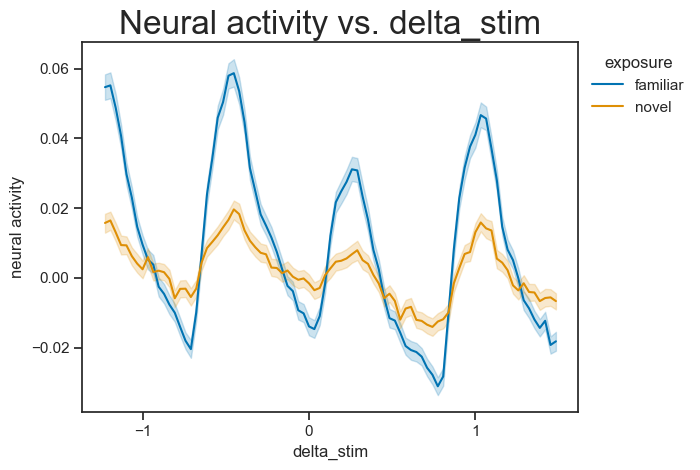

In [57]:
sns.set_style('ticks')

lineplot = sns.lineplot(data = data, x = 'time_from_stim', y = 'dF/F', hue = 'exposure', palette = 'colorblind', legend = 'full')
sns.move_legend(lineplot, "upper left", bbox_to_anchor=(1, 1), frameon = False)
sns.set(font="Verdana", font_scale = 2)
plt.xlabel('delta_stim')
plt.ylabel('neural activity')
plt.title('Neural activity vs. delta_stim')

### Saving Figures
Saving figures can be tricky at times. You have to specify a high DPI (300, depends on the size of your plot) if you want decent resolution, and sometimes axes can get lopped off.

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(data = data, x = 'time_from_stim' , y = 'dF/F', hue = 'exposure', style = 'omitted')
plt.xlabel('Delta Stim')
plt.ylabel('dF/F')
plt.title('Real Data')

plt.savefig('my_figure.png', dpi = 300)

Oh no! Our axes, it's broken!

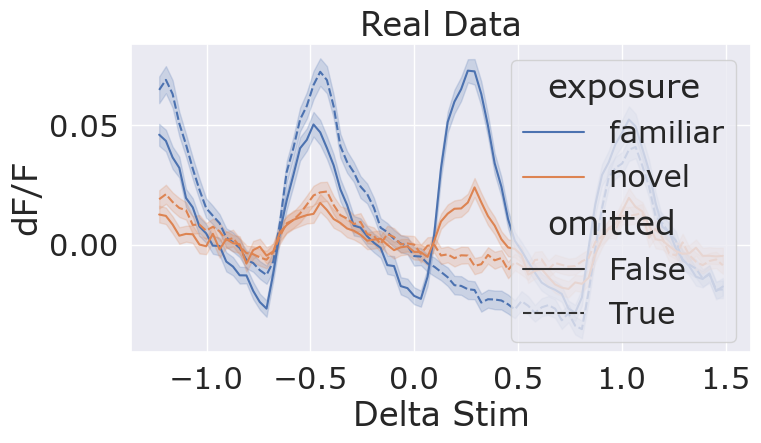

In [58]:
plt.figure(figsize=(8,4))
sns.lineplot(data = data, x = 'time_from_stim' , y = 'dF/F', hue = 'exposure', style = 'omitted')
plt.xlabel('Delta Stim')
plt.ylabel('dF/F')
plt.title('Real Data')
#use this bbox_inches command to fix things
plt.savefig('my_figure.png', dpi = 300, bbox_inches = 'tight')

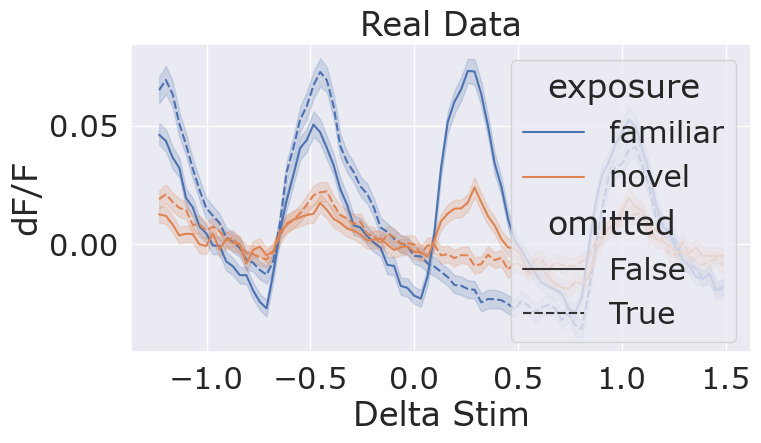

In [59]:
plt.figure(figsize=(8,4))
sns.lineplot(data = data, x = 'time_from_stim' , y = 'dF/F', hue = 'exposure', style = 'omitted')
plt.xlabel('Delta Stim')
plt.ylabel('dF/F')
plt.title('Real Data')

# to save as pdf, specify pdf at the end of file name
plt.savefig('my_figure.pdf', dpi = 300, bbox_inches = 'tight')